In [99]:
#import libraries
from faker import Faker
import random
import numpy as np
import pandas as pd
import seaborn as sns

In [100]:
#generate data
np.random.seed(1)
num_samples=1000
Degree=['Kollam','Ernakulam','Trivandrum','Thrissur','Palakkad']
choice=['Yes','No']
fake=Faker()
Seller=[fake.name() for _ in range(num_samples)]
Location=[random.choice(Degree) for _ in range(num_samples)]
area=[round(random.uniform(50, 500), 2) for _ in range(num_samples)]
Bedrooms=np.random.randint(1,6,size=num_samples)
Bathrooms=np.random.randint(1,5,size=num_samples)
pool = [random.choice(choice) for _ in range(num_samples)]
garden = [random.choice(choice) for _ in range(num_samples)]
garage = np.random.randint(0, 4, size=num_samples)
data=pd.DataFrame({
    'Seller Name':Seller,
    'House Location':Location,
    'Area':area,
    'Bedrooms':Bedrooms,
    'Bathrooms':Bathrooms,
    'Pool':pool,
    'Garden':garden,
    'Garage':garage,
    })
def calculatePrice(row):
    price= 50000 + 700 * row['Area'] + 20000 * row['Bedrooms'] + 15000 * row['Bathrooms'] + 5000 * row['Garage'] + np.random.normal(0, 25000)
    if row['Pool']=="Yes":
        price+= 40000
    if row['Garden']=="Yes":
        price+=15000
    price = np.round(price, 2)
    return price
data['Price']=data.apply(calculatePrice,axis=1)

In [101]:
data.head()

,Seller Name,House Location,Area,Bedrooms,Bathrooms,Pool,Garden,Garage,Price
0,Timothy Mccarthy,Ernakulam,310.82,4,3,Yes,No,2,435050.73
1,Katie Rush MD,Kollam,230.44,5,1,No,No,2,342590.74
2,Matthew Baker,Palakkad,176.89,1,2,No,Yes,3,277030.26
3,Laura Smith,Trivandrum,104.57,2,4,No,Yes,3,255283.72
4,Tanya Rowe,Kollam,89.74,4,4,No,No,2,252193.42


In [102]:
data.isnull().sum()

Seller Name       0
House Location    0
Area              0
Bedrooms          0
Bathrooms         0
Pool              0
Garden            0
Garage            0
Price             0
dtype: int64

In [103]:
missing_values_prob = 0.03
for column in data.columns:
 if column=='Seller Name':
    continue
 data[column] = data[column].apply(lambda x: np.nan if random.random() < missing_values_prob else x)

In [104]:
data.isnull().sum()

Seller Name        0
House Location    28
Area              28
Bedrooms          35
Bathrooms         31
Pool              34
Garden            23
Garage            29
Price             20
dtype: int64

In [105]:
#Examining the composition of the dataset
print(data.shape)

(1000, 9)


In [106]:
print(pd.value_counts(data.dtypes))

float64    5
object     4
Name: count, dtype: int64


C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_4312\2614425308.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(data.dtypes))


In [107]:
#Structure of numerical col
print(data.describe(exclude='object'))

             Area    Bedrooms   Bathrooms      Garage          Price
count  972.000000  965.000000  969.000000  971.000000     980.000000
mean   270.449198    3.030052    2.551084    1.459320  373089.887245
std    127.679078    1.419386    1.132594    1.114637  101379.748421
min     50.180000    1.000000    1.000000    0.000000  134437.490000
25%    157.460000    2.000000    2.000000    0.000000  292729.500000
50%    272.595000    3.000000    3.000000    1.000000  373010.040000
75%    376.480000    4.000000    4.000000    2.000000  449877.615000
max    498.630000    5.000000    4.000000    3.000000  654880.510000


<Axes: title={'center': 'Number of unique values in numeric columns'}>

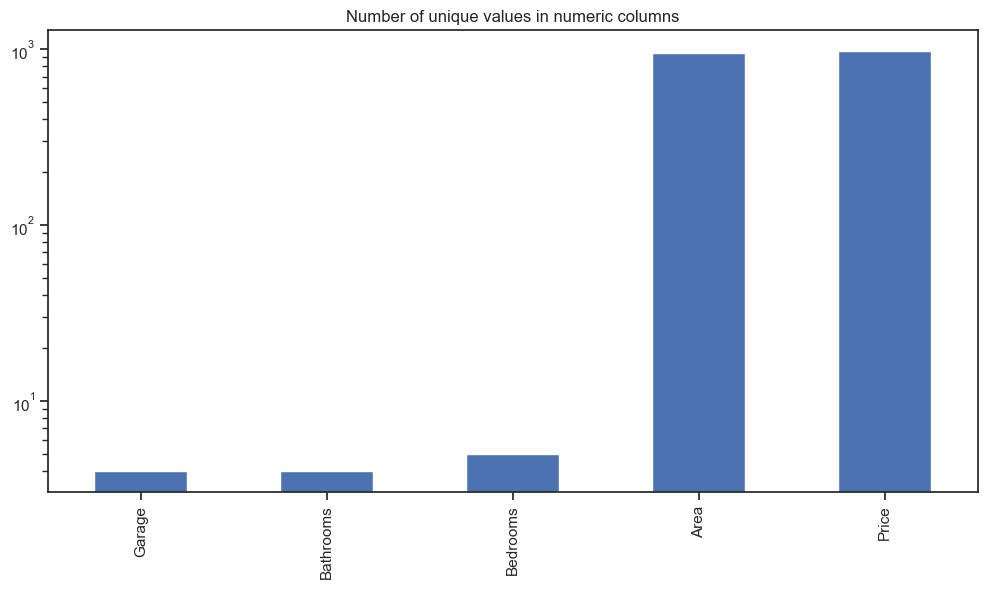

In [108]:
#Graphical representation of unique values in numeric col
unique_values = data.select_dtypes(include='number').nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(12, 6), title='Number of unique values in numeric columns')

In [109]:
#Structure of non-numerical
print(data.describe(exclude="number"))

            Seller Name House Location Pool Garden
count              1000            972  966    977
unique              994              5    2      2
top     Veronica Taylor       Thrissur  Yes     No
freq                  2            202  490    499


In [110]:
#Graphical representation of unique values in non-numeric col
unique_values = data.select_dtypes(include="object").nunique().sort_values()

In [111]:
print(unique_values)

Garden              2
Pool                2
House Location      5
Seller Name       994
dtype: int64


<Axes: title={'center': 'Unique values per feature'}>

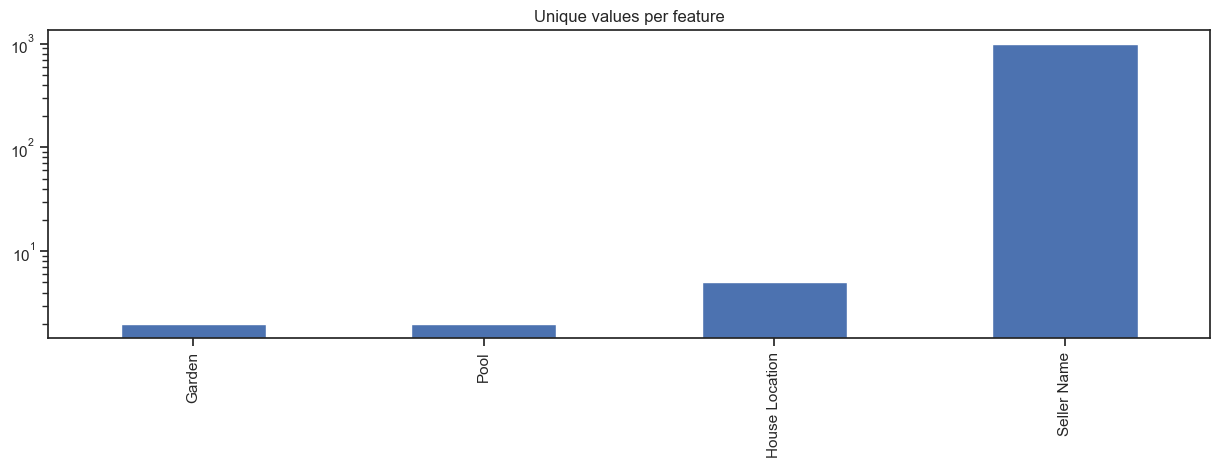

In [112]:
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

Quality Investigation

In [113]:
#duplicate check
duplicate = data.drop(labels=['Seller Name'], axis=1).duplicated().sum()
print(f'There are {duplicate} duplicated rows in the dataset')

There are 0 duplicated rows in the dataset


In [114]:
#missing values
data.head(15).isnull()

,Seller Name,House Location,Area,Bedrooms,Bathrooms,Pool,Garden,Garage,Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [115]:
data.isnull().sum()

Seller Name        0
House Location    28
Area              28
Bedrooms          35
Bathrooms         31
Pool              34
Garden            23
Garage            29
Price             20
dtype: int64

Additionally, we can enhance our understanding of the occurrence and approximate locations of missing values within the dataset by employing visual representations through graphs.

<Axes: >

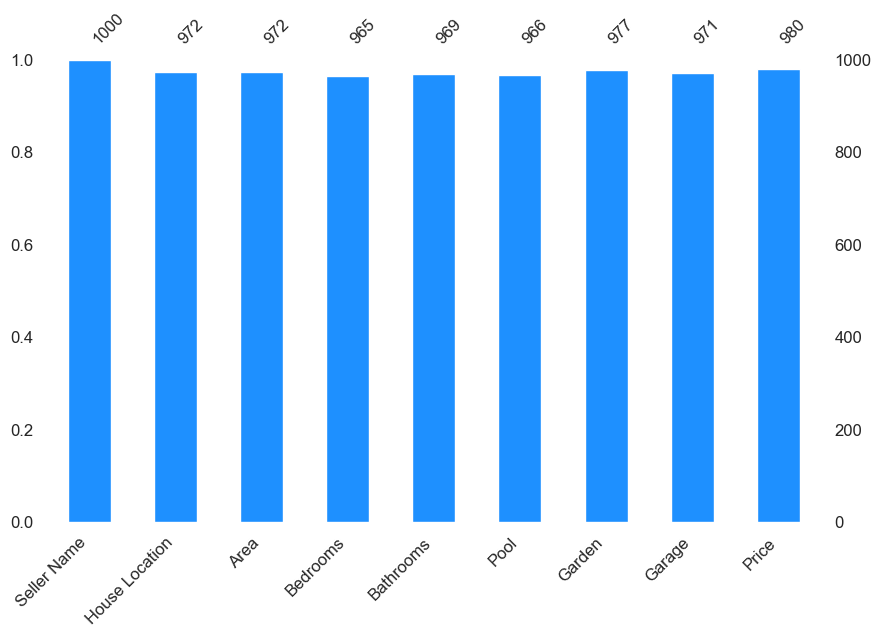

In [116]:
import missingno as msno
msno.bar(data, color='dodgerblue', figsize=(10, 6), fontsize=12)

Text(0, 0.5, 'Row')

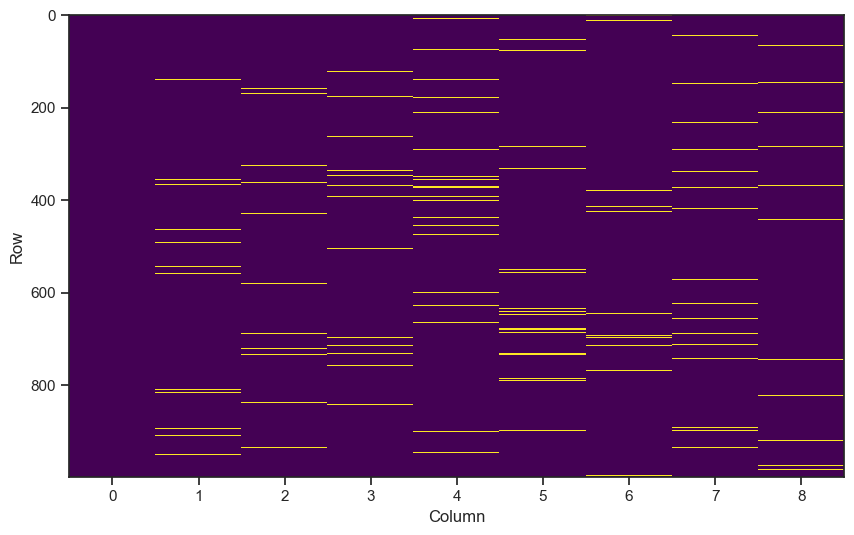

In [117]:
#identifying missing values approximate location
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(data.isnull(), cmap='viridis', aspect='auto', interpolation='nearest')
plt.xlabel('Column')
plt.ylabel('Row')

Missing value imputation

In [118]:
#filling missing values with most frequent value in each categorical column
ost_frequent_Location = data['House Location'].mode()[0]
data['House Location'].fillna(most_frequent_Location, inplace=True)
most_frequent_Pool = data['Pool'].mode()[0]
data['Pool'].fillna(most_frequent_Pool, inplace=True)
most_frequent_Garden = data['Garden'].mode()[0]
data['Garden'].fillna(most_frequent_Garden, inplace=True)

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_4312\2160853609.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['House Location'].fillna(most_frequent_Location, inplace=True)
C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_4312\2160853609.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [119]:
data.isnull().sum()

Seller Name        0
House Location     0
Area              28
Bedrooms          35
Bathrooms         31
Pool               0
Garden             0
Garage            29
Price             20
dtype: int64

In [120]:
#filling missing values with mean in each numerical column
data['Bedrooms'].fillna(data['Bedrooms'].mean(), inplace=True)
data['Bathrooms'].fillna(data['Bathrooms'].mean(), inplace=True)
data['Area'].fillna(data['Area'].mean(), inplace=True)
data['Garage'].fillna(data['Garage'].mean(), inplace=True)
data['Price'].fillna(data['Price'].mean(), inplace=True)

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_4312\2817263614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bedrooms'].fillna(data['Bedrooms'].mean(), inplace=True)
C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_4312\2817263614.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [121]:
data.isnull().sum()

Seller Name       0
House Location    0
Area              0
Bedrooms          0
Bathrooms         0
Pool              0
Garden            0
Garage            0
Price             0
dtype: int64

<Axes: >

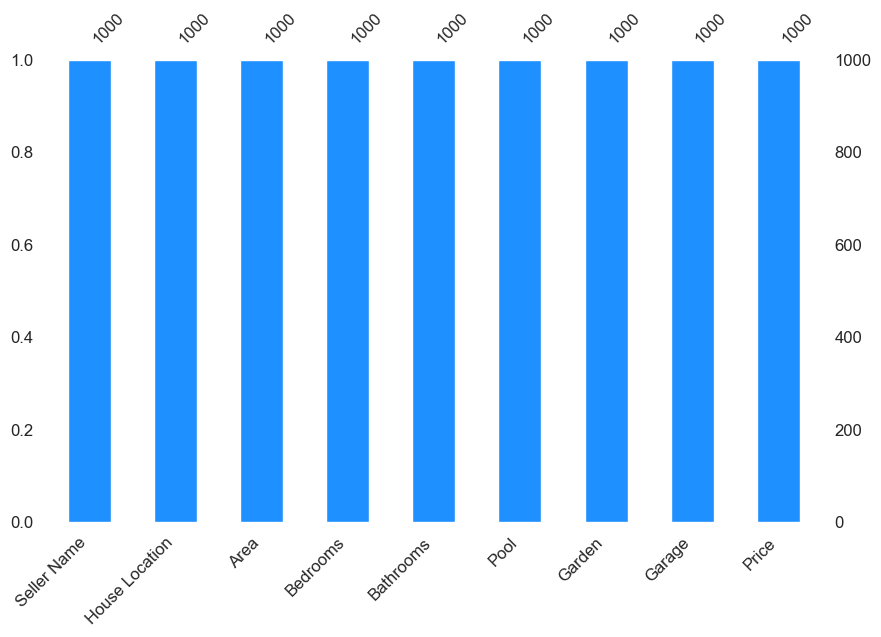

In [122]:
import missingno as msno
msno.bar(data, color='dodgerblue', figsize=(10, 6), fontsize=12)

Insights into the Data

In [123]:
#1. What is the average price of a house in the dataset?
Avg_Price = data['Price'].mean()
print(f'The aveg price of the house in data is {Avg_Price}')

The aveg price of the house in data is 373089.88724489795


In [124]:
#2.What is the distribution of the houses along the various Locations?
Location_distribution = data['House Location'].value_counts()
print(Location_distribution)

House Location
Palakkad      229
Thrissur      202
Trivandrum    196
Kollam        192
Ernakulam     181
Name: count, dtype: int64


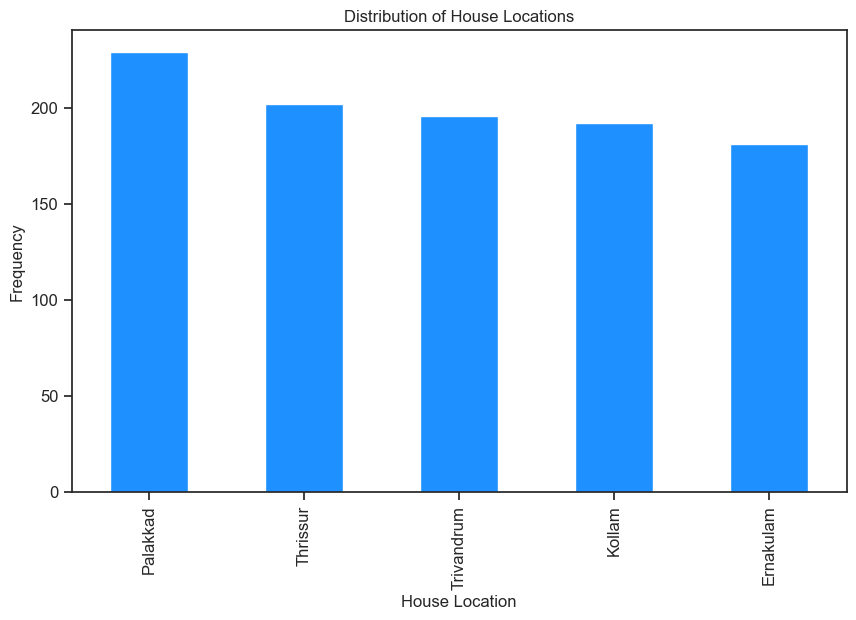

In [125]:
# Plot the distribution using a bar plot
Location_distribution.plot(kind='bar', color='dodgerblue', figsize=(10, 6), fontsize=12)
plt.title('Distribution of House Locations')
plt.xlabel('House Location')
plt.ylabel('Frequency')
plt.show()

In [126]:
#3. What is the average area of the houses for sale?
avg_area = data['Area'].mean()
print(f'Average area of house for sale is {avg_area}')

Average area of house for sale is 270.4491975308642


In [127]:
#4. What is the price range of all houses on sale?
price_range = data['Price'].agg(['min', 'max'])
print(f'The price range of all houses on sale is {price_range}')

The price range of all houses on sale is min    134437.49
max    654880.51
Name: Price, dtype: float64


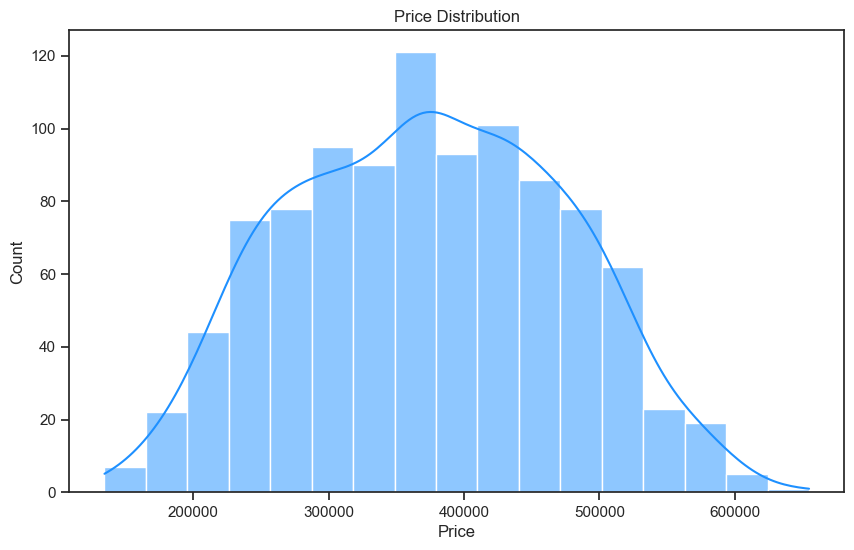

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], color='dodgerblue', kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

In [129]:
#5. Wahat is the distribution of houses with and without pool facilities?
houses_with_pool = data.groupby(['House Location', 'Pool']).size().unstack()
print(houses_with_pool)

Pool             No  Yes
House Location          
Ernakulam        88   93
Kollam           90  102
Palakkad        106  123
Thrissur         97  105
Trivandrum       95  101


In [130]:
#6. What is the average number of Bedrooms available in the houses for sale?
avverage_bedrooms = int(data['Bedrooms'].mean())+1
print(f'Average number of bedrooms: {avverage_bedrooms:.2f}\n')

Average number of bedrooms: 4.00



In [131]:
#7. What is the average number of Bathrooms available in the houses for sale?
Avg_bathrooms = int(data['Bathrooms'].mean())+1
print(f'Average number of bathrooms: {Avg_bathrooms:.2f}\n')

Average number of bathrooms: 3.00



In [132]:
#8. What is the Range of Area in sq.m of the houses for sale?
area_range = data['Area'].agg(['min', 'max'])
print(f'The area range of the houses for sale is {area_range}')

The area range of the houses for sale is min     50.18
max    498.63
Name: Area, dtype: float64


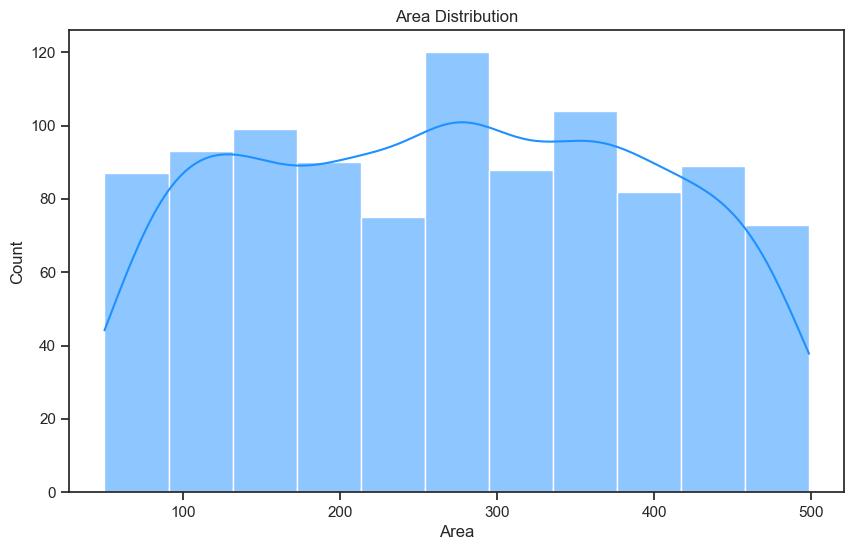

In [133]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Area'], color='dodgerblue', kde=True)
plt.title('Area Distribution')
plt.xlabel('Area')
plt.show()

In [134]:
#9.What is the average garage space available?
avg_garage = int(data['Garage'].mean())+1
print(f'average garage space available: {avg_garage:.2f}\n')

average garage space available: 2.00



In [135]:
#10  What is the distribution of houses with and without Garden?
house_withgarden = data.groupby(['House Location', 'Garden']).size().unstack()
print(house_withgarden)

Garden           No  Yes
House Location          
Ernakulam        96   85
Kollam          102   90
Palakkad        115  114
Thrissur         97  105
Trivandrum      112   84


In [136]:
#11. What is the average price of the houses based on the Location?
average_price_location = data.groupby('House Location')['Price'].mean()
print(average_price_location)

House Location
Ernakulam     375275.663681
Kollam        371838.615648
Palakkad      371468.462647
Thrissur      375852.080553
Trivandrum    371344.794368
Name: Price, dtype: float64


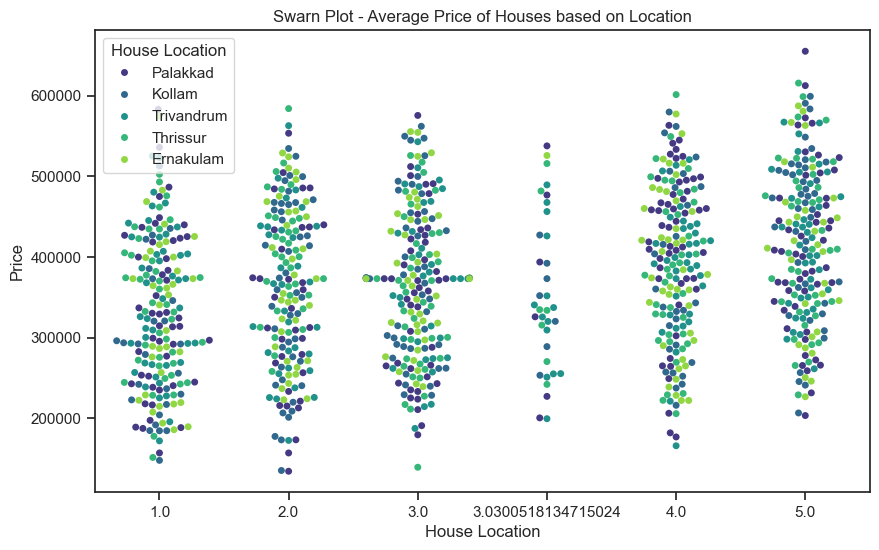

In [137]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Bedrooms', y='Price', data=data, hue='House Location', palette='viridis')
plt.title('Swarn Plot - Average Price of Houses based on Location')
plt.xlabel('House Location')
plt.ylabel('Price')
plt.show()

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_4312\330977218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='House Location', y='Price', data=data, palette='viridis')


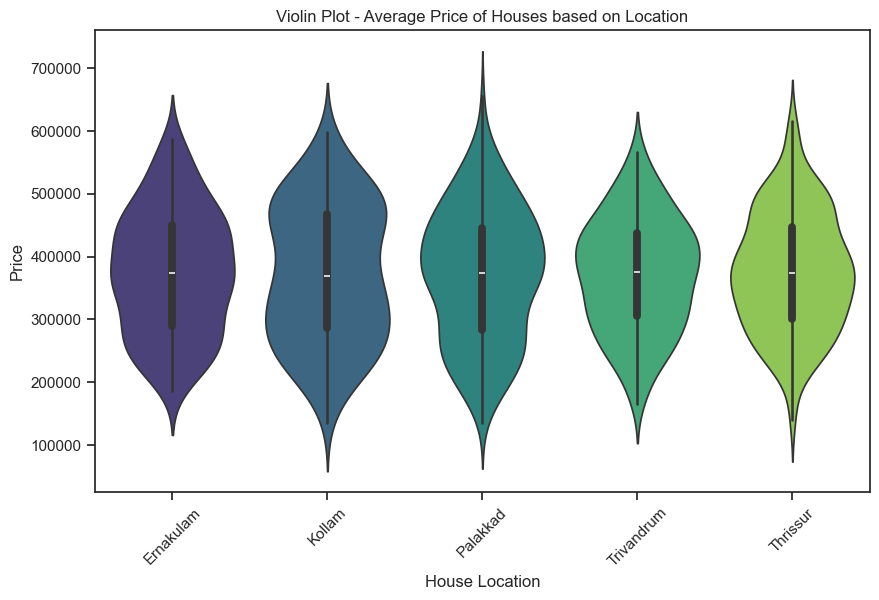

In [138]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='House Location', y='Price', data=data, palette='viridis')
plt.title('Violin Plot - Average Price of Houses based on Location')
plt.xlabel('House Location')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [139]:
#12. What is the average price of the houses based on the Garage Space?
avg_price_garage = data.groupby('Garage')['Price'].mean()
print(avg_price_garage)

Garage
0.00000    369966.592306
1.00000    362498.675249
1.45932    376231.886552
2.00000    374843.573168
3.00000    385766.996010
Name: Price, dtype: float64


<Figure size 1000x600 with 0 Axes>

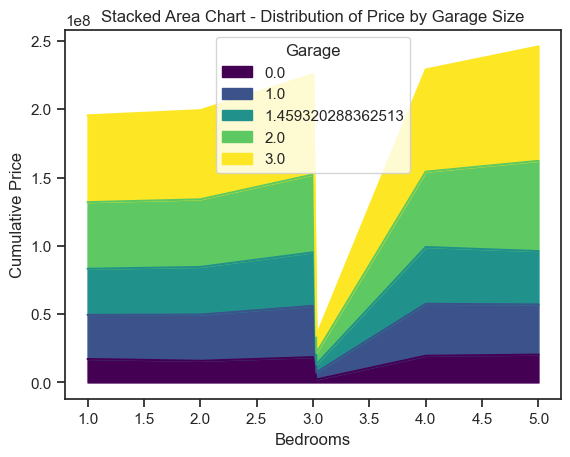

In [140]:
cumulative_price = data.groupby(['Bedrooms','Garage'])['Price'].sum().groupby(level=0).cumsum().unstack()
plt.figure(figsize=(10, 6))
cumulative_price.plot(kind='area',colormap='viridis', stacked=True)
plt.title('Stacked Area Chart - Distribution of Price by Garage Size')
plt.xlabel('Bedrooms')
plt.ylabel('Cumulative Price')
plt.show()

## Initial Data Transformation

In [141]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['pool encoder'] = label_encoder.fit_transform(data['Pool'])
data['garden encoder'] = label_encoder.fit_transform(data['Garden'])

In [142]:
data.head(2)

,Seller Name,House Location,Area,Bedrooms,Bathrooms,Pool,Garden,Garage,Price,pool encoder,garden encoder
0,Timothy Mccarthy,Ernakulam,310.82,4.0,3.0,Yes,No,2.0,435050.73,1,0
1,Katie Rush MD,Kollam,230.44,5.0,1.0,No,No,2.0,342590.74,0,0


# Various plots to deepen the data

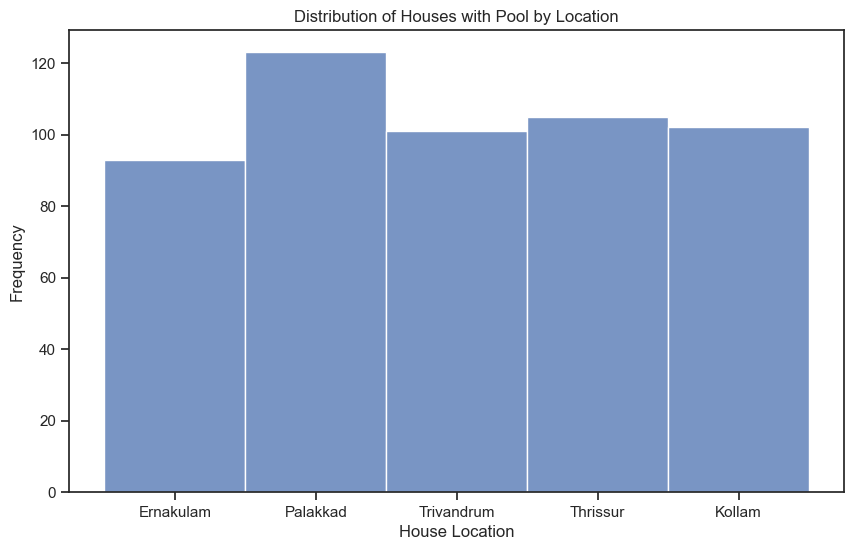

In [143]:
#Distribution of houses with pool by location
data_pool =data[data['Pool']=='Yes']
plt.figure(figsize=(10, 6))
sns.histplot(data_pool['House Location'])
plt.title('Distribution of Houses with Pool by Location')   
plt.xlabel('House Location')
plt.ylabel('Frequency')
plt.show()

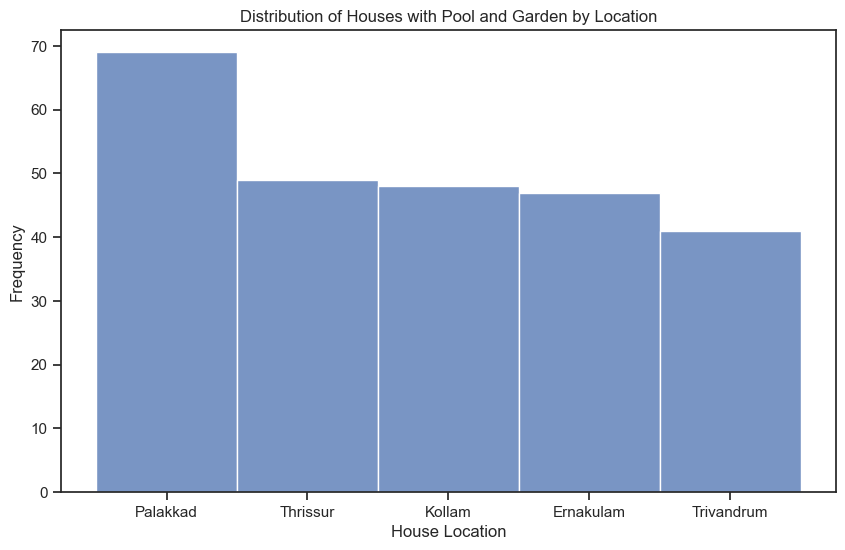

In [144]:
# Distribution of House by Pool and Garden
data_pool_garden = data[(data['Pool']=='Yes')&(data['Garden']=='Yes')]
plt.figure(figsize=(10, 6))
sns.histplot(data_pool_garden['House Location'])
plt.title('Distribution of Houses with Pool and Garden by Location')
plt.xlabel('House Location')
plt.ylabel('Frequency')
plt.show()

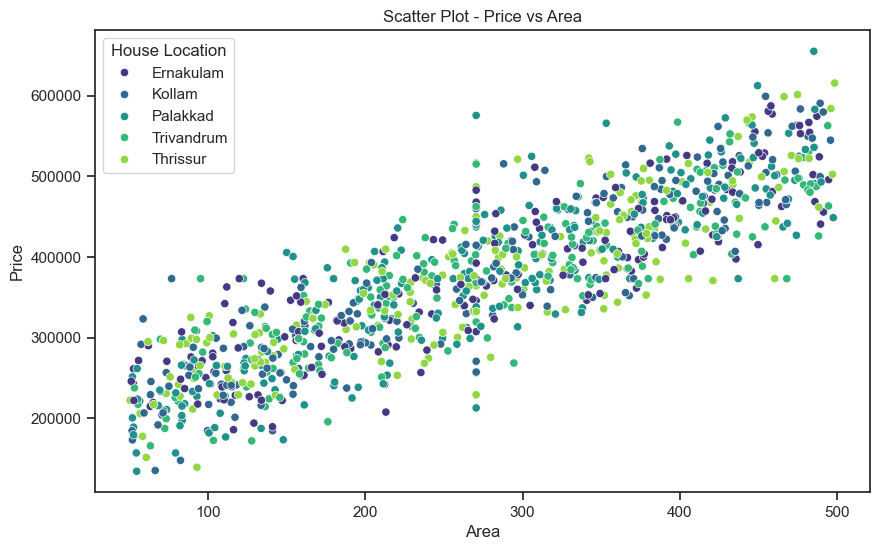

In [145]:
#Scatter plot Price vs Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=data, hue='House Location', palette='viridis')
plt.title('Scatter Plot - Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

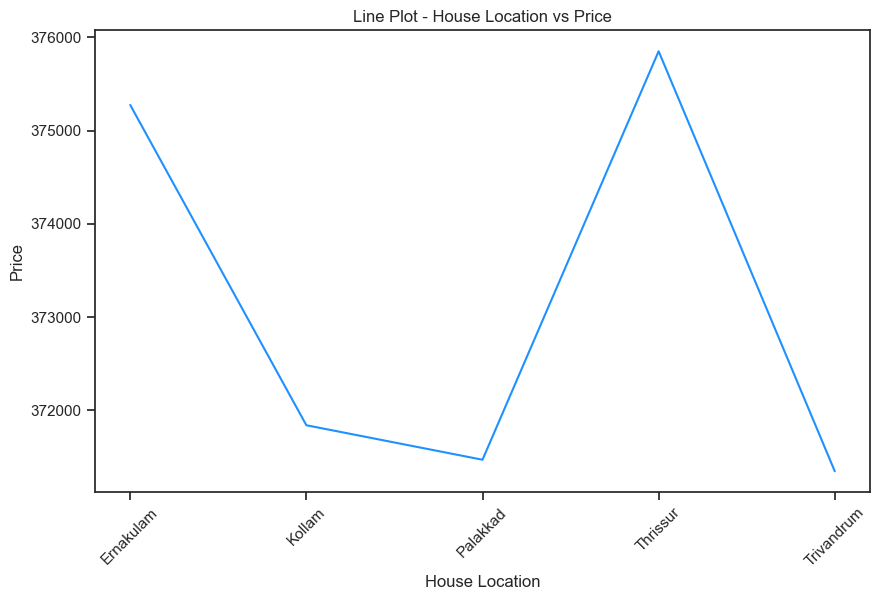

In [146]:
#line plot house location vs Price
plt.figure(figsize=(10, 6))
sns.lineplot(x='House Location', y='Price', data=data.groupby('House Location')['Price'].mean().reset_index(), color='dodgerblue')
plt.title('Line Plot - House Location vs Price')
plt.xlabel('House Location')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

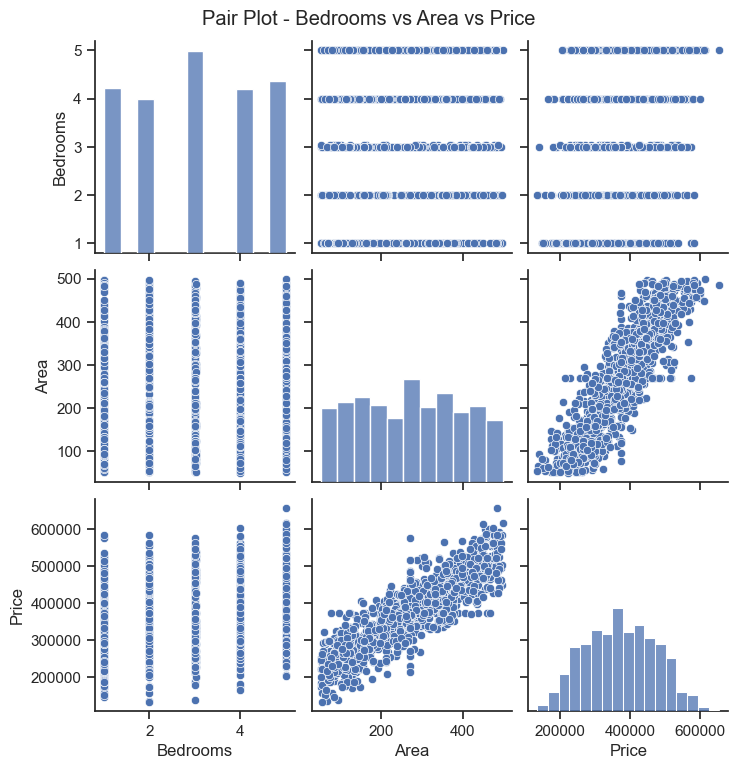

In [147]:
#Pair plot Bedroom vs Area vs Price
plt.figure(figsize=(10, 6))
sns.pairplot(data[['Bedrooms', 'Area', 'Price']])
plt.suptitle('Pair Plot - Bedrooms vs Area vs Price', y=1.02)
plt.show()


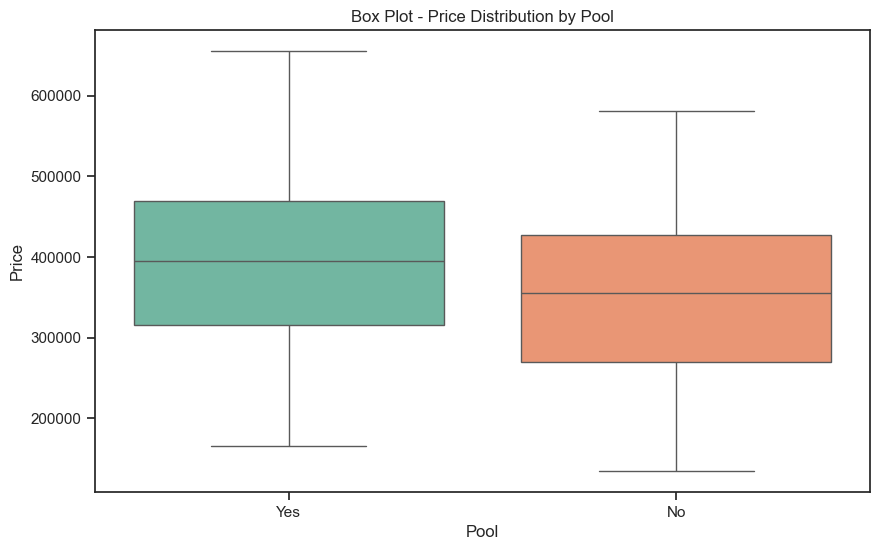

In [148]:
#Box plot price distribution by pool
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pool', y='Price', data=data, palette='Set2', hue='Pool')
plt.title('Box Plot - Price Distribution by Pool')
plt.xlabel('Pool')
plt.ylabel('Price')
plt.show()

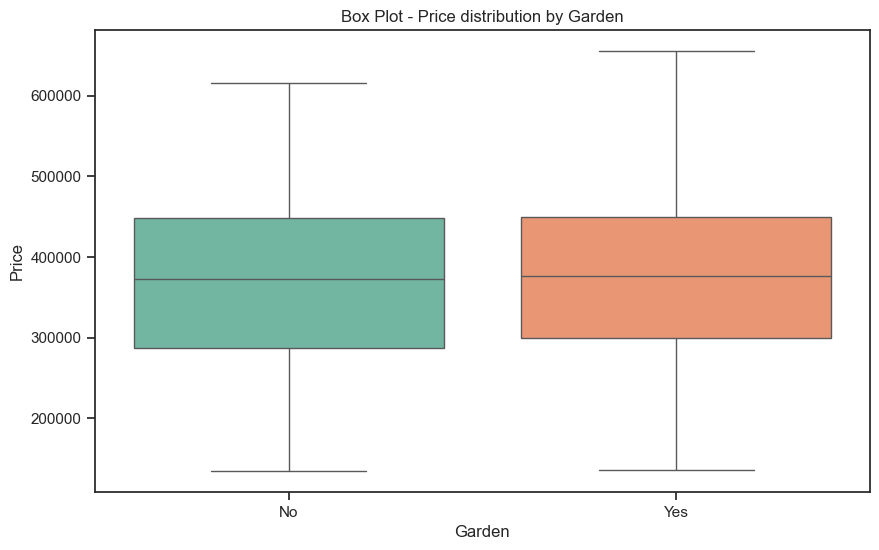

In [149]:
#Box plot price distribution by Garden
plt.figure(figsize=(10,6))
sns.boxplot(x='Garden', y='Price', data=data, palette='Set2', hue='Garden')
plt.title('Box Plot - Price distribution by Garden')
plt.xlabel('Garden')
plt.ylabel('Price')
plt.show()

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_4312\3144379119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Bedrooms', y='Price', data=data, palette='viridis')


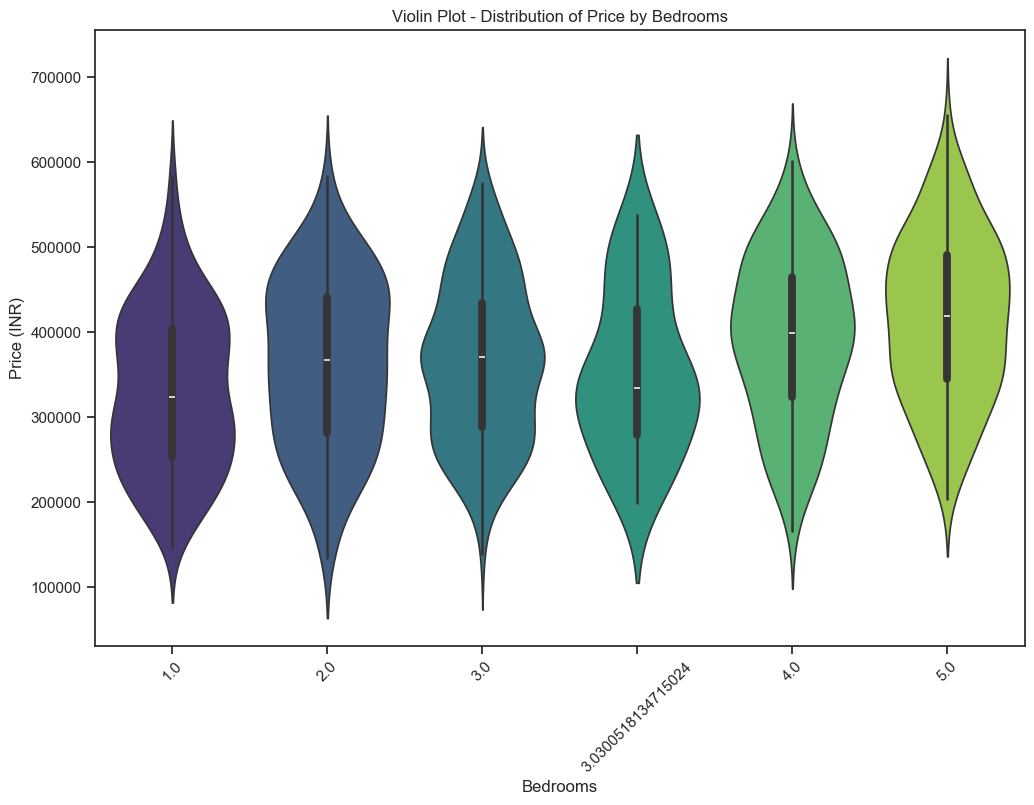

In [150]:
#Violin plot Bedrooms vs Price 
plt.figure(figsize=(12, 8))
sns.violinplot(x='Bedrooms', y='Price', data=data, palette='viridis')
plt.title('Violin Plot - Distribution of Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_4312\209045200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Garage', data=data, palette='Set1')


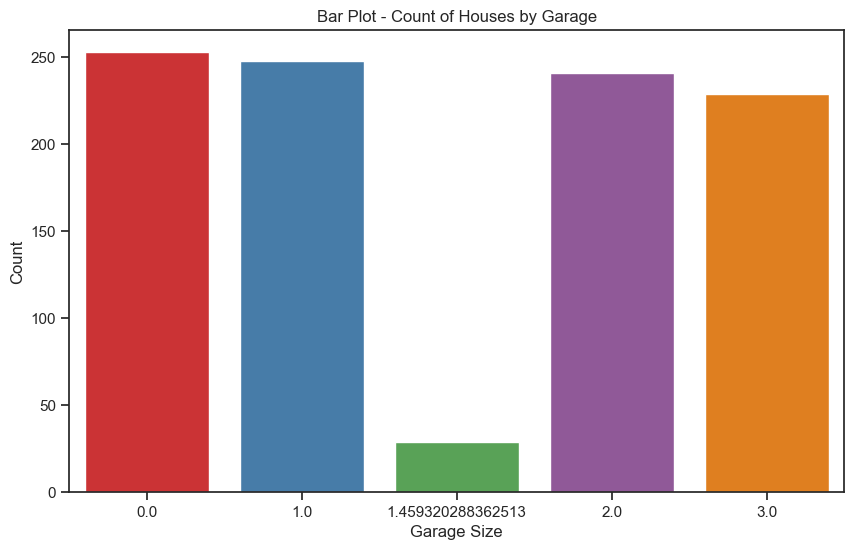

In [151]:
#Bar Plot - Count of Houses by Garage Size
plt.figure(figsize=(10,6))
sns.countplot(x='Garage', data=data, palette='Set1')
plt.title("Bar Plot - Count of Houses by Garage")
plt.xlabel('Garage Size')
plt.ylabel('Count')
plt.show()

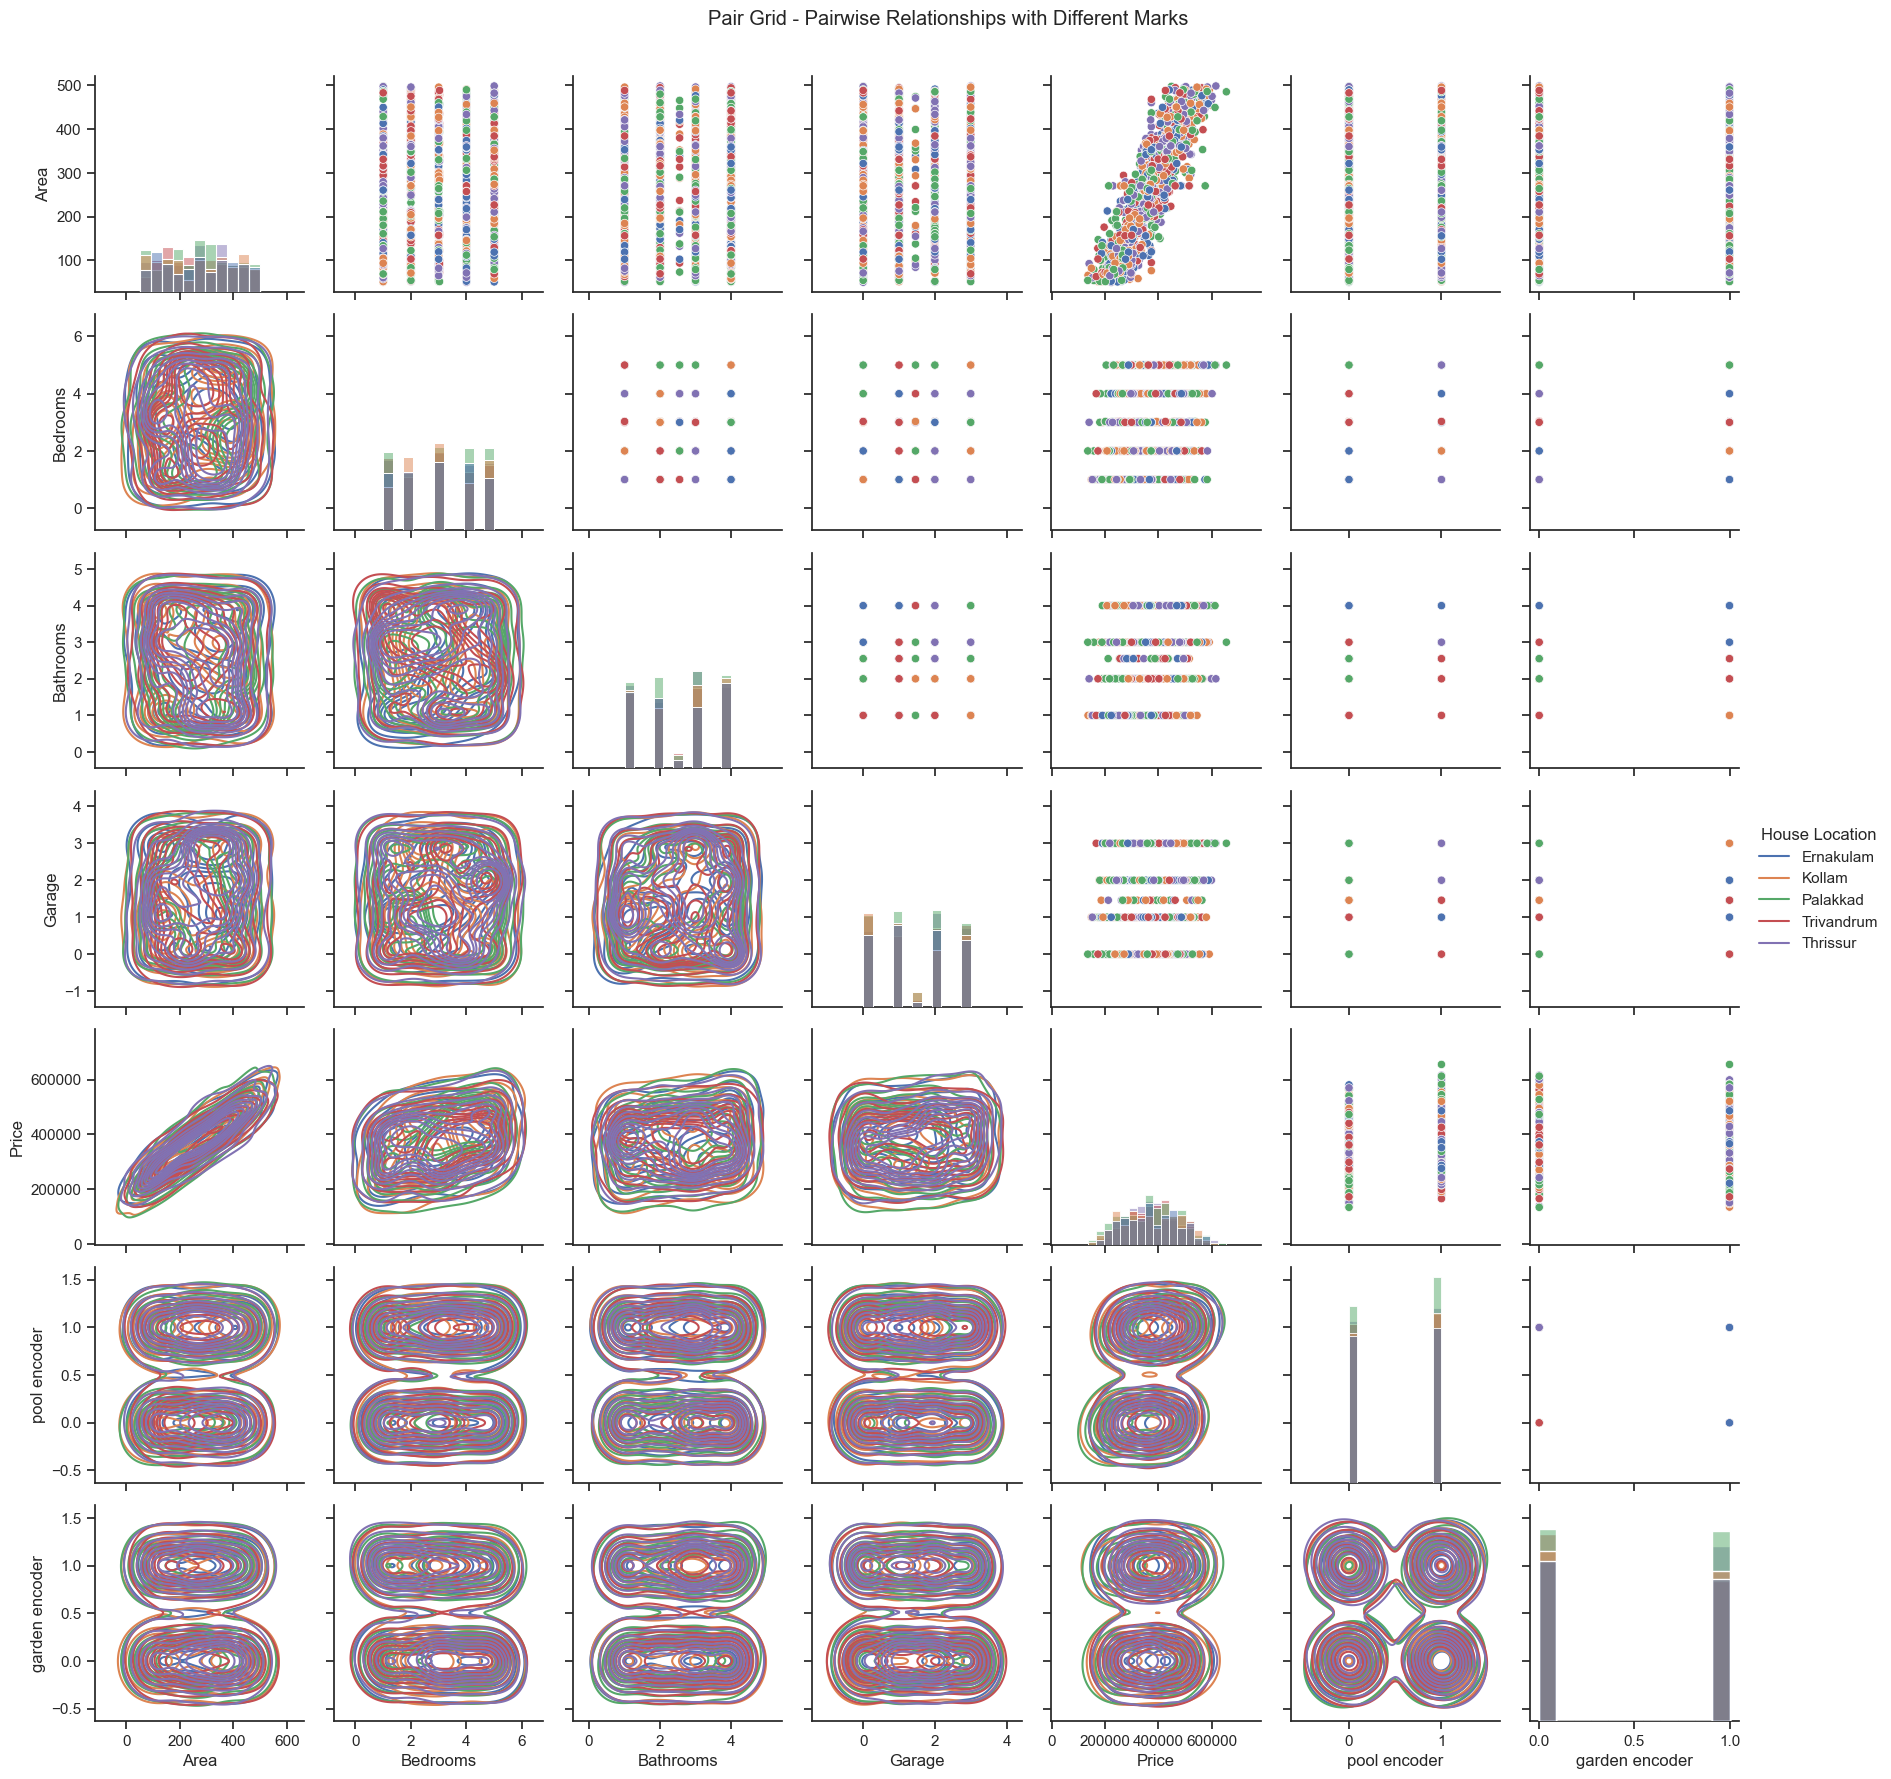

In [152]:
#Pair Grid - Pairwise Relatioship with Different Marks
sns.set(style="ticks")
g = sns.PairGrid(data, hue="House Location")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.suptitle('Pair Grid - Pairwise Relationships with Different Marks', y=1.02)
plt.show()

# Final Data Transformation

In [153]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# 1. Log Transformation of 'Price'
data['Log_Price'] = np.log1p(data['Price'])
data.drop('Price', axis=1, inplace=True)

# 2. Normalize 'Area' using Min-Max Scaling
scaler = MinMaxScaler()
data['Normalized_area']=scaler.fit_transform(data[['Area']])
data.drop('Area', axis=1, inplace=True)

# 3. Dropping Normal Pool and Garden
data.drop(['Pool', 'Garden'], axis=1, inplace=True)

# Display the transformed dataset
print("Transformed Dataset:")
print(data)
print("\n")

Transformed Dataset:
          Seller Name House Location  Bedrooms  Bathrooms  Garage  \
0    Timothy Mccarthy      Ernakulam  4.000000        3.0     2.0   
1       Katie Rush MD         Kollam  5.000000        1.0     2.0   
2       Matthew Baker       Palakkad  1.000000        2.0     3.0   
3         Laura Smith     Trivandrum  2.000000        4.0     3.0   
4          Tanya Rowe         Kollam  4.000000        4.0     2.0   
..                ...            ...       ...        ...     ...   
995    Michael Wilson     Trivandrum  3.030052        1.0     0.0   
996      Sarah Wilson       Thrissur  1.000000        3.0     2.0   
997   Isaac Velasquez     Trivandrum  5.000000        2.0     1.0   
998          Mary Ray       Palakkad  5.000000        2.0     0.0   
999   Cynthia Hendrix     Trivandrum  3.000000        3.0     1.0   

     pool encoder  garden encoder  Log_Price  Normalized_area  
0               1               0  12.983220         0.581202  
1               0     

In [154]:
data.to_csv('transformed_House_data.csv', index=False)